# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [8]:
pwd

'/content/CV-HW/lesson_5'

In [58]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


Let's load the image.

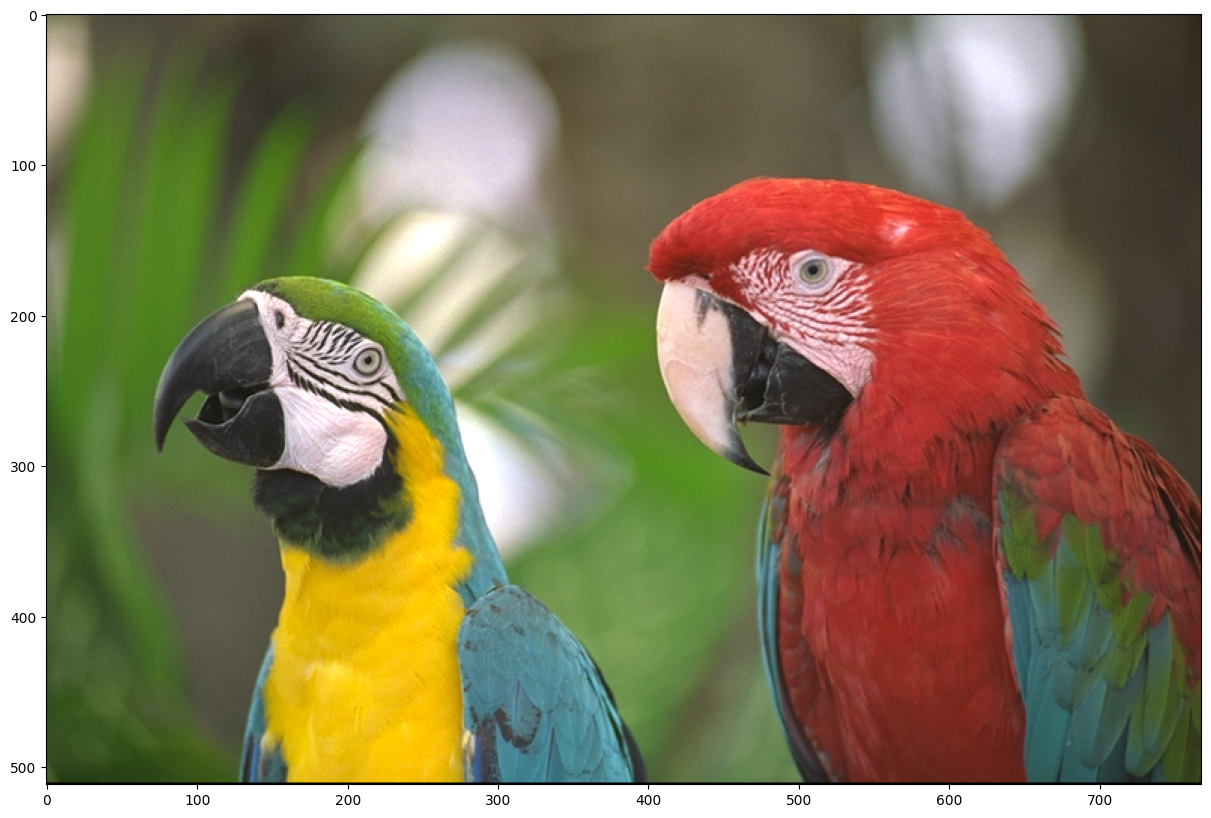

In [59]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)


Let's start with gray tones first.

In [60]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])


Using the colour pallette, let's quantize the original image.


In [61]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors[closest_index]


        # Apply quantization
        quantized[r, c, :] = new_pixel


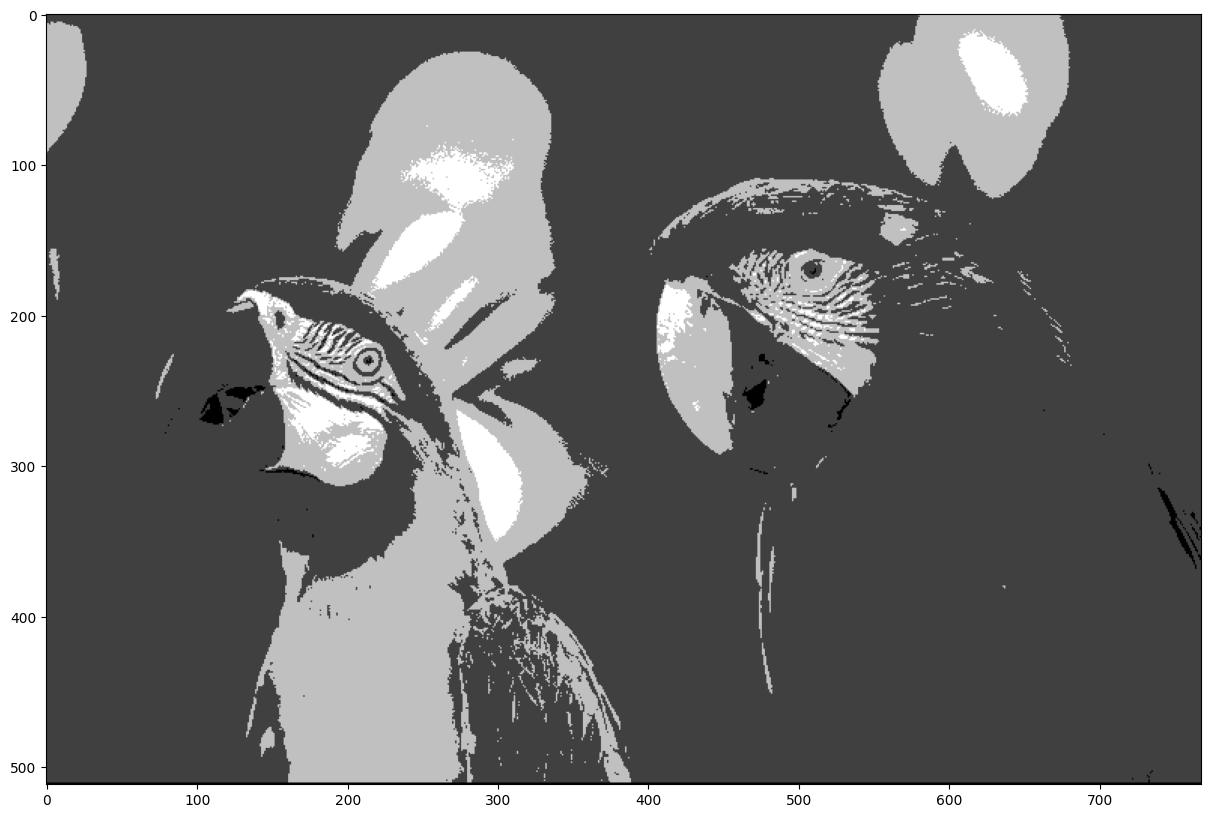

In [62]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))


In [63]:
# Compute average quantization error (Peak Signal-to-Noise Ratio (PSNR))
# the image already casted to float
def psnr(ref, target):
    error = ref-target
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)

print('PSNR', psnr(img, quantized), 'dB')


PSNR 14.826061547883146 dB


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.


In [64]:
from tqdm import tqdm

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Define the Floyd-Steinberg diffusion matrix

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
        # Note: You may need more than one line of code here
        #       img_tmp =
        img_tmp[r, c + 1] += quant_error * 7 / 16        # right
        img_tmp[r + 1, c - 1] += quant_error * 3 / 16    # left, down
        img_tmp[r + 1, c] += quant_error * 5 / 16        # down
        img_tmp[r + 1, c + 1] += quant_error * 1 / 16    # right, down

        # Apply dithering
        dithering[r, c, :] = new_pixel


100%|██████████| 510/510 [00:16<00:00, 30.90it/s]


(<Axes: >, <matplotlib.image.AxesImage at 0x78b08397fbe0>)

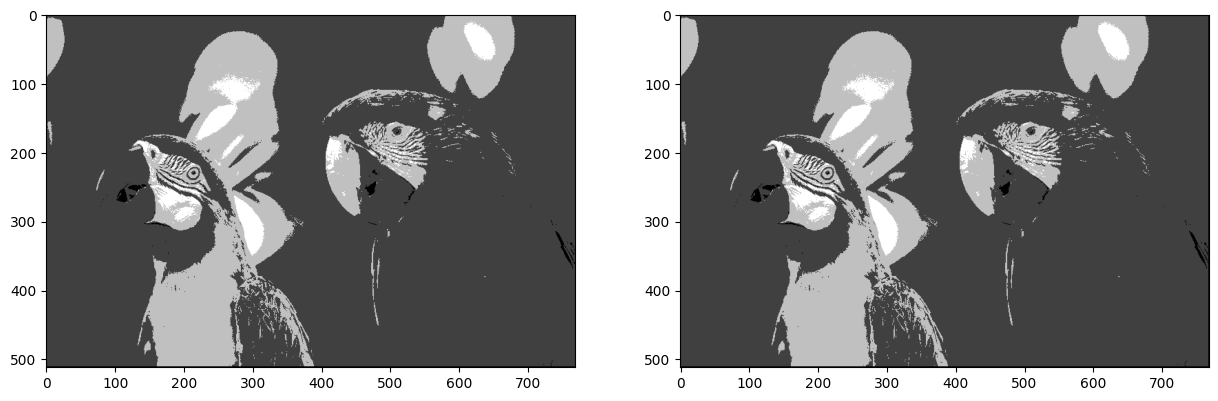

In [49]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering


In [57]:
# Compute average quantization error for dithered image
# the image already casted to float
def psnr(ref, target):
    error = ref-target
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)

print('PSNR', psnr(img, dithering), 'dB')


PSNR 16.95993064023295 dB


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?

Diftered has higher PSNR

* Which image looks better to you?
They look the same

* Can you repeat the same process using only two colours: black and white? Show me :-)

100%|██████████| 512/512 [00:06<00:00, 76.85it/s]


PSNR 8.787832707162266 dB


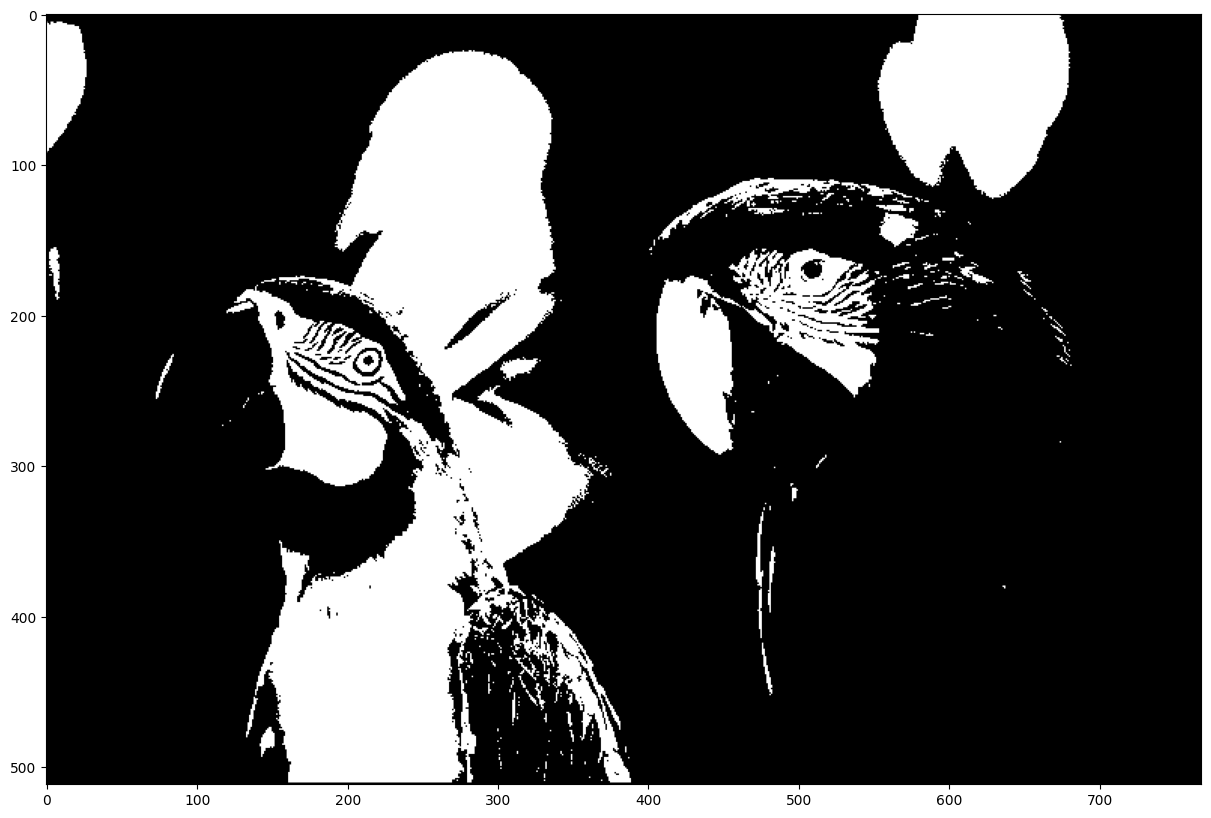

In [65]:
# Black, white
colors2 = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized2 = np.zeros_like(img)

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors2 - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors2[closest_index]


        # Apply quantization
        quantized2[r, c, :] = new_pixel

# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized2.astype(np.uint8))

# Compute average quantization error (Peak Signal-to-Noise Ratio (PSNR))
# the image already casted to float
def psnr(ref, target):
    error = ref-target
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)

print('PSNR', psnr(img, quantized2), 'dB')

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [69]:

# The following snippet of code will give you the 16 optimal colours for your original image
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_
print(colors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[248.89051971]
 [ 57.11311676]
 [146.39410428]
 [101.71779238]
 [204.69041247]
 [  4.45985479]
 [ 78.27561208]
 [ 33.01001505]
 [165.99386356]
 [226.08905973]
 [ 90.6362494 ]
 [129.15125147]
 [ 45.65520495]
 [114.00193777]
 [186.32948984]
 [ 67.47078558]]


Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?